In [1710]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra

# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import matplotlib.pyplot as plt
# import sklearn

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1711]:
# # Import training set
# df = pd.read_csv("/kaggle/input/autoam-car-price-prediction/train.csv")
# df_test = pd.read_csv("/kaggle/input/autoam-car-price-prediction/test.csv")

In [1712]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb
import numpy as np

import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor, cv
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import KBinsDiscretizer

In [1713]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [1714]:
df_temp = df.copy()

In [1715]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(df_temp.drop("price", axis = 1), df_temp["price"], test_size = 0.2 )

In [1716]:
X_train["running"] = X_train["running"].str.replace("  km", "")
X_train["running"] = X_train["running"].str.replace("  miles", "")

X_test["running"] = X_test["running"].str.replace("  km", "")
X_test["running"] = X_test["running"].str.replace("  miles", "")

df_test["running"] = df_test["running"].str.replace("  km", "")
df_test["running"] = df_test["running"].str.replace("  miles", "")

In [1717]:
X_train["running"].astype(int)
X_test["running"].astype(int)

df_test["running"].astype(int)

0       24000
1       85000
2       30000
3       53000
4      230000
        ...  
406     33400
407     60000
408    218000
409     40000
410    120000
Name: running, Length: 411, dtype: int32

# 4. Convert String to categories

In [1718]:
for label, content in X_train.items():
    if pd.api.types.is_string_dtype(content):
        X_train[label] = content.astype("category").cat.as_ordered()
        
for label, content in X_test.items():
    if pd.api.types.is_string_dtype(content):
        X_test[label] = content.astype("category").cat.as_ordered()
        
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label] = content.astype("category").cat.as_ordered()

In [1719]:
for label, content in X_train.items():
    if pd.api.types.is_string_dtype(content):
        X_train[label] = X_train[label].cat.codes

for label, content in X_test.items():
    if pd.api.types.is_string_dtype(content):
        X_test[label] = X_test[label].cat.codes
        
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label] = df_test[label].cat.codes

In [1720]:
X_train

,model,year,motor_type,running,wheel,color,type,status,motor_volume
1308,0,2019,2,266,0,1,4,1,2.0
1018,0,2013,2,74,0,14,4,2,2.0
1046,1,2020,2,245,0,2,4,1,2.0
1202,0,2017,2,372,0,2,4,1,2.0
721,0,2020,0,90,0,7,4,1,2.0
...,...,...,...,...,...,...,...,...,...
1130,3,2017,2,356,0,2,5,1,2.5
1294,0,2014,2,70,0,1,4,4,2.0
860,2,2005,0,179,0,14,4,1,2.6
1459,3,2018,2,420,0,16,2,1,2.0


In [1721]:
X_test

,model,year,motor_type,running,wheel,color,type,status,motor_volume
677,2,1995,2,112,0,4,4,2,2.0
1340,4,2022,2,68,0,8,5,1,2.0
984,2,2017,2,13,0,2,4,1,2.0
607,2,2017,2,173,0,1,4,1,2.0
1394,2,2001,2,40,0,2,4,2,2.4
...,...,...,...,...,...,...,...,...,...
306,1,2017,1,168,0,3,4,2,2.0
192,1,2016,2,116,0,11,4,1,2.0
309,1,2021,2,32,0,6,4,1,2.0
654,2,2000,2,55,0,2,4,4,2.0


In [1722]:
X_combined = pd.concat([X_train, X_test], ignore_index=True)

y_combined = pd.concat([y_train, y_test], ignore_index=True)

In [1723]:
def draw_scatter(name, X_combined, y_combined):
    plt.scatter(X_combined[name], y_combined)
    plt.title(f'Scatter Plot between {name} and price')
    plt.xlabel(name)
    plt.ylabel('price')
    plt.show()

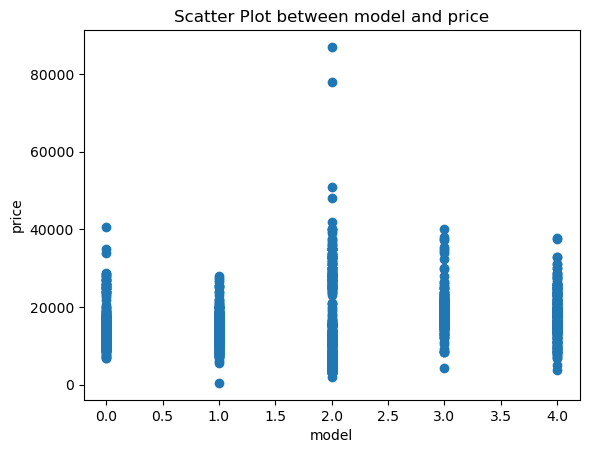

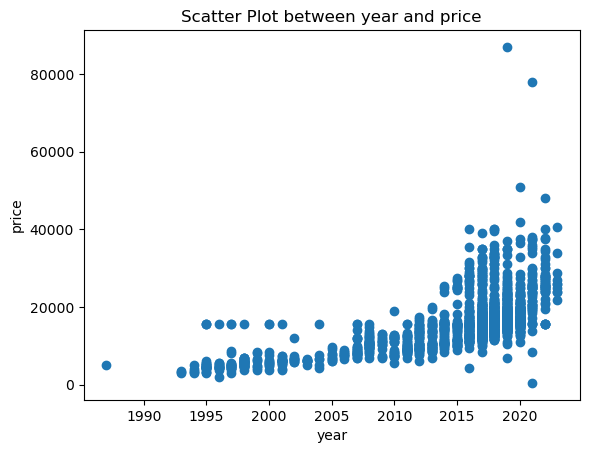

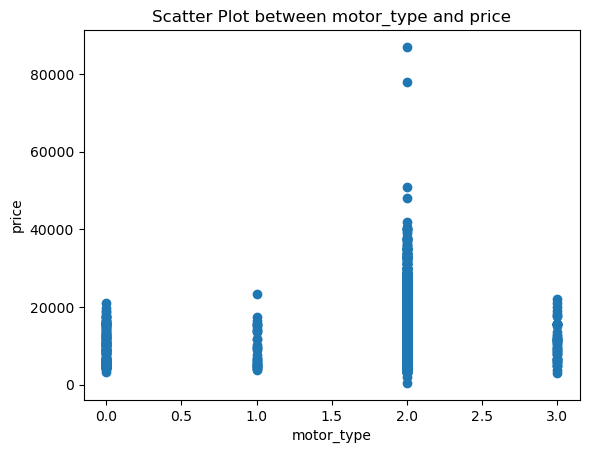

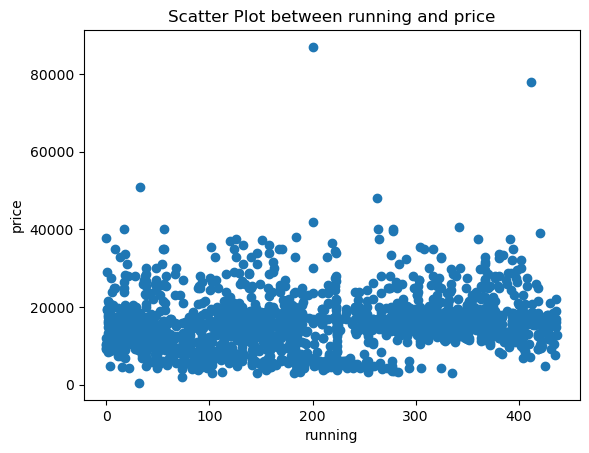

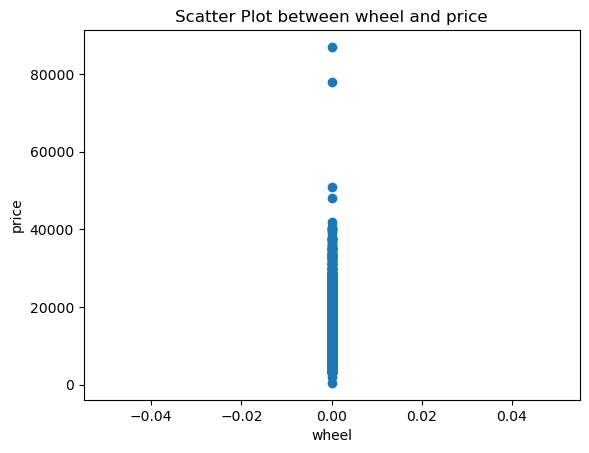

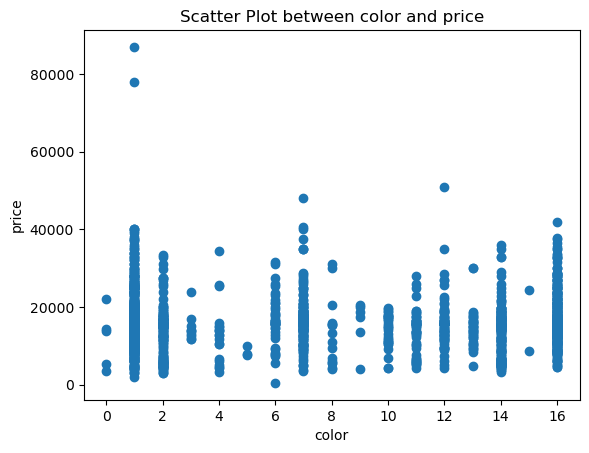

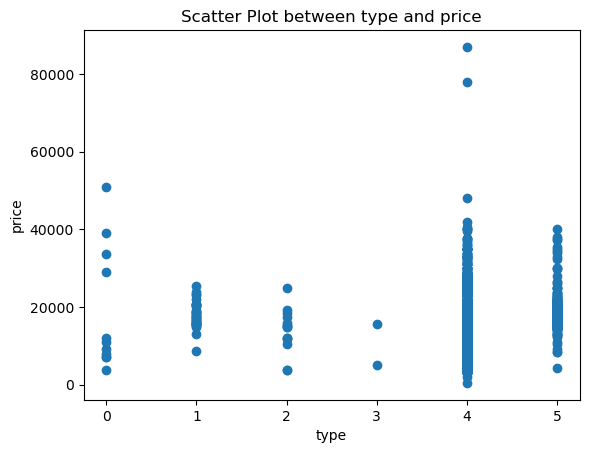

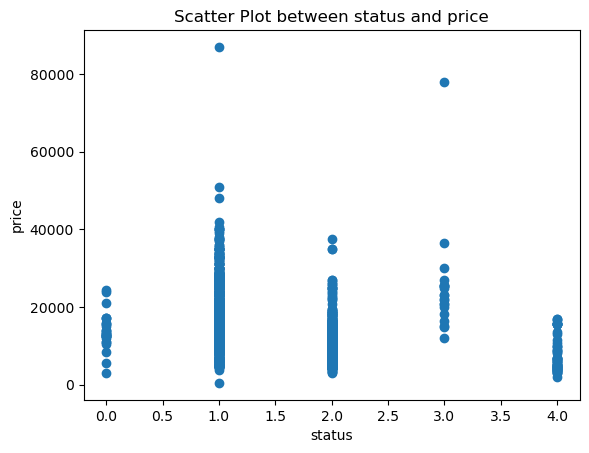

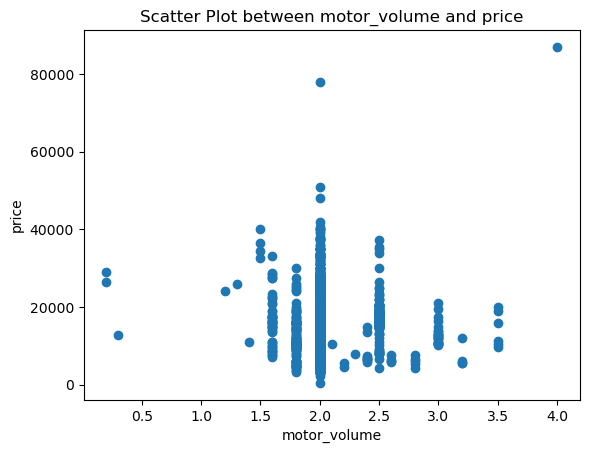

In [1724]:
for i in X_combined.columns:
    draw_scatter(i, X_combined, y_combined)

# 5. Modelling

In [1725]:
X_train

,model,year,motor_type,running,wheel,color,type,status,motor_volume
1308,0,2019,2,266,0,1,4,1,2.0
1018,0,2013,2,74,0,14,4,2,2.0
1046,1,2020,2,245,0,2,4,1,2.0
1202,0,2017,2,372,0,2,4,1,2.0
721,0,2020,0,90,0,7,4,1,2.0
...,...,...,...,...,...,...,...,...,...
1130,3,2017,2,356,0,2,5,1,2.5
1294,0,2014,2,70,0,1,4,4,2.0
860,2,2005,0,179,0,14,4,1,2.6
1459,3,2018,2,420,0,16,2,1,2.0


In [1726]:
X_train1 = X_train.copy()
X_test1 = X_test.copy()
y_train1 = y_train.copy()
y_test1 = y_test.copy()

In [1727]:
current_year = 2024 
X_train1['car_age'] = current_year - X_train1['year']
X_test1["car_age"] = current_year - X_test1['year']

In [1728]:
X_train1['mileage_category'] = (pd.cut(X_train1['running'], bins=[-1, 100, 200, 300, np.inf], labels=[0, 1, 2, 3])).astype(int)
X_test1['mileage_category'] = (pd.cut(X_test1['running'], bins=[-1, 100, 200, 300, np.inf], labels=[0, 1, 2, 3])).astype(int)

In [1729]:
# X_train1 = X_train1[y_train1 <= 60000]
# y_train1 = y_train1[y_train1 <= 60000]

In [1730]:
X_train1["age_squared"] = X_train1["car_age"]** 2
X_test1["age_squared"] = X_test1["car_age"] ** 2

In [1731]:
X_train1['log_running'] = np.log1p(X_train1['running'])
X_test1['log_running'] = np.log1p(X_test1['running'])

In [1732]:
# X_train1 = pd.get_dummies(X_train1, columns = ['model'], prefix = 'model_type')
# X_test1 = pd.get_dummies(X_test1, columns = ['model'], prefix = 'model_type')

# X_train1 = pd.get_dummies(X_train1, columns = ['motor_type'], prefix = 'motor_type')
# X_test1 = pd.get_dummies(X_test1, columns = ['motor_type'], prefix = 'motor_type')

# X_train1 = pd.get_dummies(X_train1, columns = ['color'], prefix = 'color_type')
# X_test1 = pd.get_dummies(X_test1, columns = ['color'], prefix = 'color_type')

# X_train1 = pd.get_dummies(X_train1, columns = ['type'], prefix = 'type')
# X_test1 = pd.get_dummies(X_test1, columns = ['type'], prefix = 'type')

# X_train1 = pd.get_dummies(X_train1, columns = ['status'], prefix = 'status_type')
# X_test1 = pd.get_dummies(X_test1, columns = ['status'], prefix = 'status_type')

# X_test1 = X_test1.reindex(columns=X_train1.columns, fill_value=0)

In [1733]:
X_train1 = X_train1.drop([ "wheel", "motor_type", "type"], axis = 1)
X_test1 = X_test1.drop(["wheel", "motor_type", "type"], axis = 1)

In [1734]:
#draw_scatter("log_running", X_train1, y_train1)

In [1735]:
def transformX(X_combined):
    X_transformed = X_combined.copy()
    X_transformed["car_age"] = 2024 - X_transformed["year"]
    X_transformed["mileage_category"] = (pd.cut(X_transformed['running'], bins=[-1, 100, 200, 300, np.inf], labels=[0, 1, 2, 3])).astype(int)
    X_transformed = X_transformed.drop([ "wheel", "motor_type", "type"], axis = 1)
    X_transformed["age_squared"] = X_transformed["car_age"]** 2
    X_transformed['log_running'] = np.log1p(X_transformed['running'])
    # X_transformed = pd.get_dummies(X_transformed, columns = ['model'], prefix = 'model_type')
    # X_transformed = pd.get_dummies(X_transformed, columns = ['motor_type'], prefix = 'motor_type')
    # X_transformed = pd.get_dummies(X_transformed, columns = ['color'], prefix = 'color_type')
    # X_transformed = pd.get_dummies(X_transformed, columns = ['type'], prefix = 'type')
    # X_transformed = pd.get_dummies(X_transformed, columns = ['status'], prefix = 'status_type')
    
    return X_transformed

In [1736]:
# def convert(X_combined, y_combined):
#     X_filter = X_combined.copy()
#     y_filter = y_combined.copy()
#     X_filter = X_filter[y_filter <= 60000]
#     y_filter = y_filter[y_filter <= 60000]
#     return X_filter, y_filter

In [1737]:
#draw_scatter('year_running_interaction', X_train1, y_train)

In [1738]:
models = {
    "Random Forest": RandomForestRegressor(n_jobs = -1, random_state = 42),
    "XGBReg": XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
}
scores = {}
for name, model in models.items():
    # Fit each model to the data
    model.fit(X_train1, y_train1)
    y_pred = model.predict(X_test1)
    scores[name] = mean_absolute_error(y_test, y_pred)

In [1739]:
scores

{'Random Forest': 2287.272933130699, 'XGBReg': 2168.0976384403493}

In [1740]:
scores

{'Random Forest': 2287.272933130699, 'XGBReg': 2168.0976384403493}

In [1741]:
%%capture
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10, 100, 10),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2),
          "max_features": [0.5, 1, "sqrt", "auto"]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1, random_state = 42),
                             param_distributions = rf_grid, cv = 5,n_iter = 20,
                             verbose = True)
rs_model.fit(X_train1, y_train1)

In [1742]:
mean_absolute_error(y_test, rs_model.predict(X_test1))

2261.0713135847072

In [1743]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [1744]:
mean_absolute_error(y_test, rs_model.predict(X_test1))

2261.0713135847072

In [1745]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [1746]:
%%capture
model = RandomForestRegressor(n_estimators = 30,
 min_samples_split= 10,
 min_samples_leaf= 17,
 max_features= 0.5,
 max_depth= None)

my_X, my_Y = transformX(X_combined), y_combined
model.fit(my_X, my_Y)

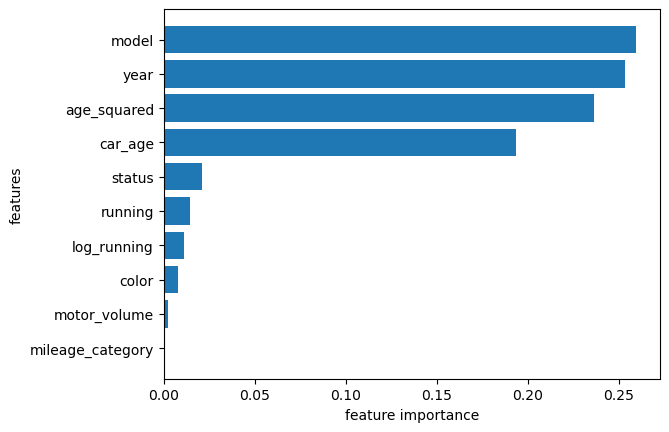

In [1747]:
# Find feature importance of our best model

def plot_features(columns, importances, n = 20):
    my_df = (pd.DataFrame({"features": columns,
                          "feature_importances": importances}).sort_values("feature_importances", ascending = True)
                        .reset_index(drop = True))
    
    fig, ax = plt.subplots()
    ax.barh(my_df["features"][:n], my_df["feature_importances"][:n])
    ax.set_ylabel("features")
    ax.set_xlabel("feature importance")

plot_features(transformX(X_combined).columns, model.feature_importances_ )

In [1748]:
param_distributions = {
    'n_estimators': range(50, 1001, 50), 
    'learning_rate': [0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3],
    'max_depth': range(2, 16),  
    'colsample_bytree': [i/10.0 for i in range(3, 11)], 
    'subsample': [i/10.0 for i in range(5, 11)],  
    'min_child_weight': range(1, 10), 
    'gamma': [i/10.0 for i in range(0, 6)],  
    'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100],  
    'reg_lambda': [1e-5, 1e-2, 0.1, 1, 100] 
}

grid_search = RandomizedSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'),
                                 param_distributions=param_distributions,
                                 n_iter=10000, 
                                 scoring='neg_mean_absolute_error',  
                                 cv=3,  
                                 verbose=2,  
                                 random_state=42, 
                                 n_jobs=-1)  

grid_search.fit(X_train1, y_train1)

print("Best parameters:", grid_search.best_params_)
print("Best mean absolute error (negated):", grid_search.best_score_)

Fitting 3 folds for each of 10000 candidates, totalling 30000 fits


C:\Users\minha\Desktop\my_proj1\env\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [1749]:
mean_absolute_error(y_test, xgboost.predict(X_test1))

1671.4576486512158

In [1750]:
%%capture
xgboost = XGBRegressor(subsample = 0.7, reg_lambda = 1e-05, reg_alpha = 100, 
                       n_estimators = 300, min_child_weight = 8,
                       max_depth = 5, learning_rate = 0.02, 
                       gamma = 0.2, colsample_bytree = 1.0)

xgboost.fit(my_X, my_Y)

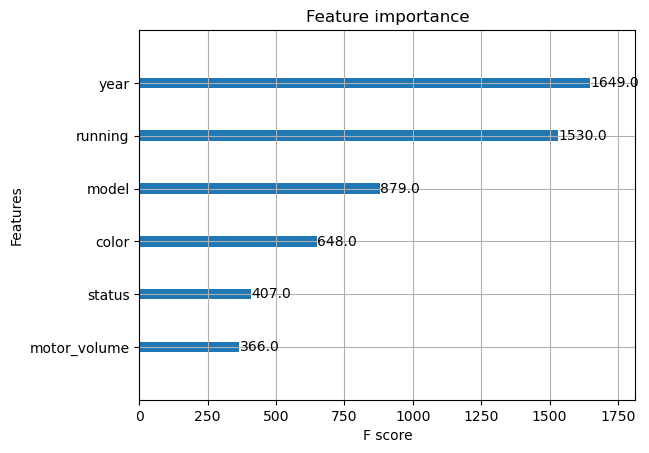

In [1751]:
xgb.plot_importance(xgboost)
plt.show()


In [1752]:
test_df = transformX(df_test).drop("Id", axis = 1)
test_df = test_df.reindex(columns=X_train1.columns, fill_value=0)

y_pred = model.predict(test_df)
result = pd.DataFrame(columns = ["Id", "price"])
result.Id = df_test.Id
result.price = y_pred
result

,Id,price
0,0,17097.710881
1,1,17085.132113
2,2,23705.590495
3,3,14702.536817
4,4,7019.078021
...,...,...
406,406,27180.364940
407,407,13650.117264
408,408,13634.550720
409,409,17479.062072


In [1753]:
y_pred = xgboost.predict(test_df)
result = pd.DataFrame(columns = ["Id", "price"])
result.Id = df_test.Id
result.price = y_pred
result

,Id,price
0,0,17473.794922
1,1,17212.693359
2,2,24771.638672
3,3,14757.957031
4,4,7163.656738
...,...,...
406,406,27882.484375
407,407,13846.359375
408,408,13911.337891
409,409,16108.527344


In [1754]:
result.to_csv('submission.csv',index=False)